<a href="https://colab.research.google.com/github/engcivilgabriel/Projects/blob/master/Dados_Airbnb_Barcelona_Catalonia_Spain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - Barcelona

<center><img alt="Analisando Airbnb" width="50%" src="https://blog.aaainovacao.com.br/wp-content/uploads/2020/05/Airbnb.jpg"></center>

Airbnb é um serviço online comunitário para as pessoas anunciarem, descobrirem e reservarem acomodações e meios de hospedagem. Sua abordagem simples e objetiva se tornou uma das mais inovadoras plataformas para tornar essa hospedagem alternativa possível.

É interessante perceber que, no final de 2018, o Airbnb já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Mais interessante ainda é que o Airbnb disponibiliza dados do site, para algumas das principais cidades do mundo por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), onde é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

**Nesta *análise*, iremos nos aprofundar nos dados referentes à cidade de Barcelona, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


## Obtenção dos Dados

Como mencionado anteriormente, todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html). Posto isto, iniciaremos a esploração dos dados baixando apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Barcelona (good for visualisations).*

In [4]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/spain/catalonia/barcelona/2020-04-16/visualisations/listings.csv")

## Análise dos Dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [6]:
# mostrar as 5 primeiras entradas
df.head()
df['neighbourhood'].unique()

array(['el Besòs i el Maresme', "el Camp d'en Grassot i Gràcia Nova",
       'el Barri Gòtic', "l'Antiga Esquerra de l'Eixample",
       'la Barceloneta', "la Dreta de l'Eixample",
       'Sant Pere, Santa Caterina i la Ribera', 'el Fort Pienc',
       "el Camp de l'Arpa del Clot", 'el Raval',
       'Diagonal Mar i el Front Marítim del Poblenou',
       'Vallcarca i els Penitents', 'el Poblenou', 'el Poble Sec',
       'el Clot', 'Sant Antoni', 'Vallvidrera, el Tibidabo i les Planes',
       'la Sagrada Família', 'Sants', 'Pedralbes', 'el Guinardó',
       'les Corts', 'Sant Andreu', 'Provençals del Poblenou', 'Horta',
       'la Vila de Gràcia', 'la Salut', 'Sant Gervasi - Galvany',
       'Sant Martí de Provençals', "la Nova Esquerra de l'Eixample",
       'Sarrià', 'el Coll', 'la Vila Olímpica del Poblenou',
       'Can Peguera', 'Hostafrancs', 'el Parc i la Llacuna del Poblenou',
       'la Bordeta', 'la Font de la Guatlla', 'el Putxet i el Farró',
       'el Baix Guinardó', 'Sant

Feitos estes levantamentos, podemos agora responder a algumas questões!

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este *dataset* que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`. 

Obs: Caso tenha interesse em extrapolar esta análise, há uma versão mais completa dos dados na mesma página com o arquivo `listings.csv.gz`.

In [7]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 20838
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em quase 25% das linhas.
* As variáveis `name` e `host_name` têm aproximadamente 0,07% e 0,04%, respectivamente, dos valores nulos.

In [8]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.244217
last_review                       0.244217
name                              0.000720
host_name                         0.000432
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, irei plotar o histograma.

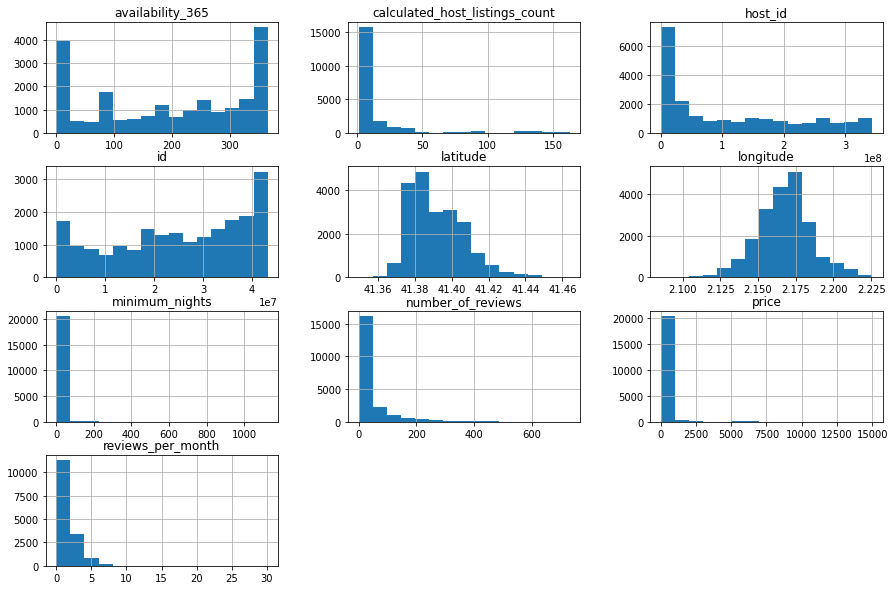

In [9]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [24]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,20838.000000,20838.000000,20838.000000,15749.000000,20838.000000,20838.000000
mean,133.874796,9.549045,35.674777,1.474476,14.715424,196.614646
std,448.687548,20.470102,64.839274,1.506891,30.782883,133.441627
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,36.000000,1.000000,1.000000,0.330000,1.000000,79.000000
50%,60.000000,2.000000,6.000000,0.990000,3.000000,215.000000
75%,105.000000,5.000000,41.000000,2.220000,11.000000,330.000000
max,15000.000000,1124.000000,731.000000,30.090000,163.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 105, porém seu valor máximo é 15000.
* A quantidade máxima de noites (`minimum_nights`) está acima do limite real de 365 dias no ano.

#### Boxplot para minimum_nights

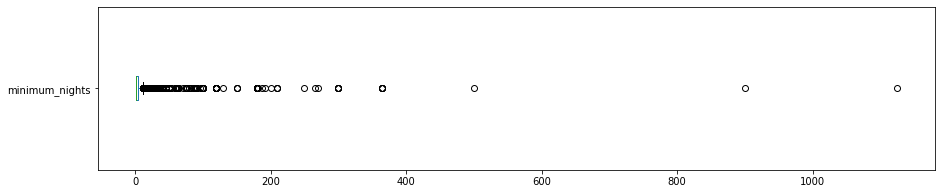

minimum_nights: valores acima de 30:
3481 entradas
16.7051%


In [25]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot para price

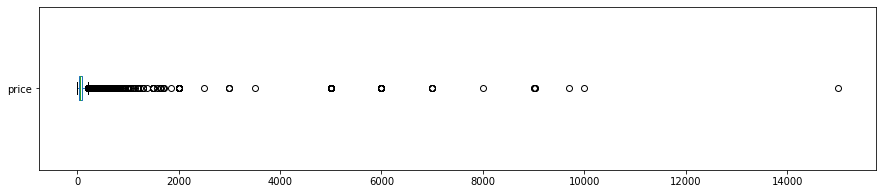


price: valores acima de 1500
140 entradas
0.6718%


In [26]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

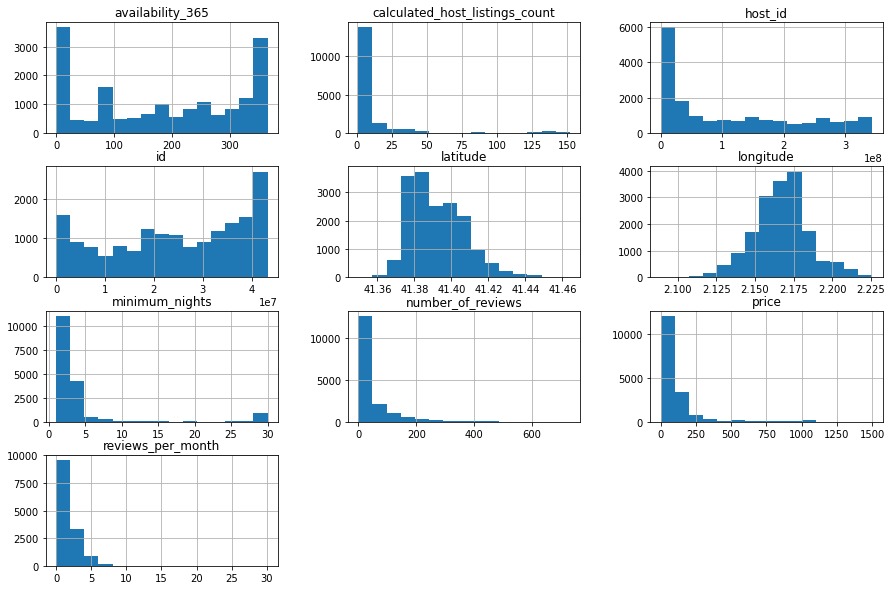

In [27]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q5. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [28]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.072026,-0.035334,-0.050494,0.304066,0.223737
minimum_nights,-0.072026,1.000000,-0.117410,-0.151918,-0.078635,0.034203
number_of_reviews,-0.035334,-0.117410,1.000000,0.656223,-0.070165,0.143993
reviews_per_month,-0.050494,-0.151918,0.656223,1.000000,-0.100692,0.081909
calculated_host_listings_count,0.304066,-0.078635,-0.070165,-0.100692,1.000000,0.257942
availability_365,0.223737,0.034203,0.143993,0.081909,0.257942,1.000000


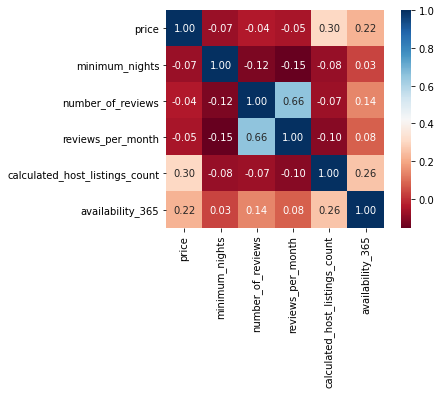

In [29]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.*italicized text*

In [30]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Private room       9876
Entire home/apt    6727
Hotel room          404
Shared room         234
Name: room_type, dtype: int64

In [31]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Private room       0.572821
Entire home/apt    0.390175
Hotel room         0.023433
Shared room        0.013572
Name: room_type, dtype: float64

### **Q7. Qual a localidade mais cara de Barcelona?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [32]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
les Tres Torres                                 232.724138
Diagonal Mar i el Front Marítim del Poblenou    230.137931
Vallcarca i els Penitents                       200.230769
la Vila Olímpica del Poblenou                   190.528090
la Dreta de l'Eixample                          186.337866
Vallvidrera, el Tibidabo i les Planes           155.535714
la Font d'en Fargues                            153.777778
la Marina del Prat Vermell                      147.666667
la Vila de Gràcia                               138.550328
el Putxet i el Farró                            134.449495
Name: price, dtype: float64

Estes dados se mostram coerentes, uma vez que tais bairros são conhecidos pela sua beleza e receptividade aos turistas, além de boa localização.

Se a região de El Raval estivesse entre estes itens, poderiamos verificar algum tipo de inconsistência na análise.

### **Q8. Como estão dispersas estas localidades?**

A título de curiosidade, como são fornecidas as Latitudes e Longitudes para os imóveis, podemos plotar cada ponto em um mapa correlacionando-os ao seu respectivo preço (`price()`). Para isso, considera-se x=longitude e y=latitude.

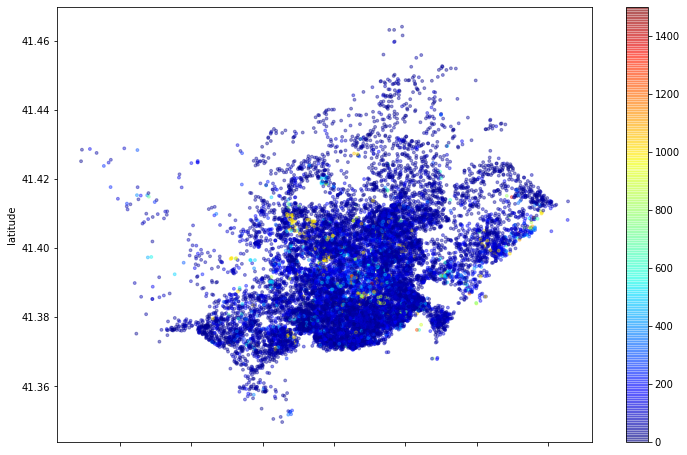

In [33]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusões

Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis. 

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos.